# FIO plots

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def search_log(filename):
    '''
    Function to read bytes from a file
    '''
    header = ["Timestamp", "server1", "server2"]
    flow = pd.read_csv(filename, delimiter='\s+',index_col = 0, names = header)
    a=flow.to_numpy()
    flow_node=0
    for i in range(len(a[0])):
        if a.mean(0)[i]!=a[0,i]:
            flow_node+= sum(a[:,i])
    return flow_node

In [3]:
def bw_ios(filename, option):
    '''
    Function to read BW or IOPS from a log file
    '''
    fopen = open(filename, mode='r+' )
    fread = fopen.readlines()
    val=0
    for line in fread:
        if "IOPS" in line:
            raw = [s for s in line.split() if option in s][0]
            value=''
            for k in raw[len(option)+1:]:
                if k!='k'and k!='K' and k!='M' and k!='G' and k!='B' and k!=',': value+=k
                else: break            

            #Map the correct units
            unit = raw[len(option)+len(value)+1]    
            if unit== 'k'or unit== 'K': factor=1e3 
            elif unit== 'M': factor=1e6 
            elif unit== 'G': factor=1e9
            else: factor = 1
            value=float(value)
            
    return value*factor

In [4]:
def plot_bw_iops(HOME, nodes, fiojobs):
    '''
    Function to plot total BW & IOPS using HOME files for n nodes and n fio_jobs
    '''
    #Plot environment
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(15, 16))

    for fjob in fiojobs:
        total_flow = []
        total_fio_bw = []
        total_fio_iops = []
        for node in nodes:
            path=HOME+str(node)+'_node/'
            content=os.listdir(path)
            fiojob = [s for s in content if "fiojob_"+str(fjob) in s]
            if len(fiojob)>1:
                if len(fiojob[0])<len(fiojob[1]): fiojob=fiojob[0]
                else: fiojob = fiojob[1]
            else:
                fiojob= fiojob[0]
            flow_node = 0
            fio_node = 0
            fio_iops=0
            for folder in os.listdir(path+fiojob):
                flow_node+= search_log(path+fiojob+"/"+folder+"/netlogs")*1e-6            #in Mb/s
                fio_node+= bw_ios(path+fiojob+"/"+folder+"/output.log","BW")*1.04858*1e-6 #in Mb/s
                fio_iops+= bw_ios(path+fiojob+"/"+folder+"/output.log", "IOPS")*1e-3      #in k
            total_flow.append(flow_node)
            total_fio_bw.append(fio_node)
            total_fio_iops.append(fio_iops)

        #plt.plot(nodes,total_flow, '--',label='fio_tjob='+str(fjob))
        ax[0].plot(nodes,total_fio_bw,'o--',label='fio_job='+str(fjob))
        ax[1].plot(nodes,total_fio_iops,'o--',label='fio_job='+str(fjob))
    ax[0].legend()
    ax[0].set_xticks(nodes)
    ax[0].set_xlabel('nodes')
    ax[0].set_ylabel('MB/s')
    ax[0].set_title("Total Bandwidth vs. n nodes")

    ax[1].legend()
    ax[1].set_xticks(nodes)
    ax[1].set_xlabel('nodes')
    ax[1].set_ylabel('kIOPS')
    ax[1].set_title("Total IOPS vs. n nodes")
    plt.show()

# Seqread plots

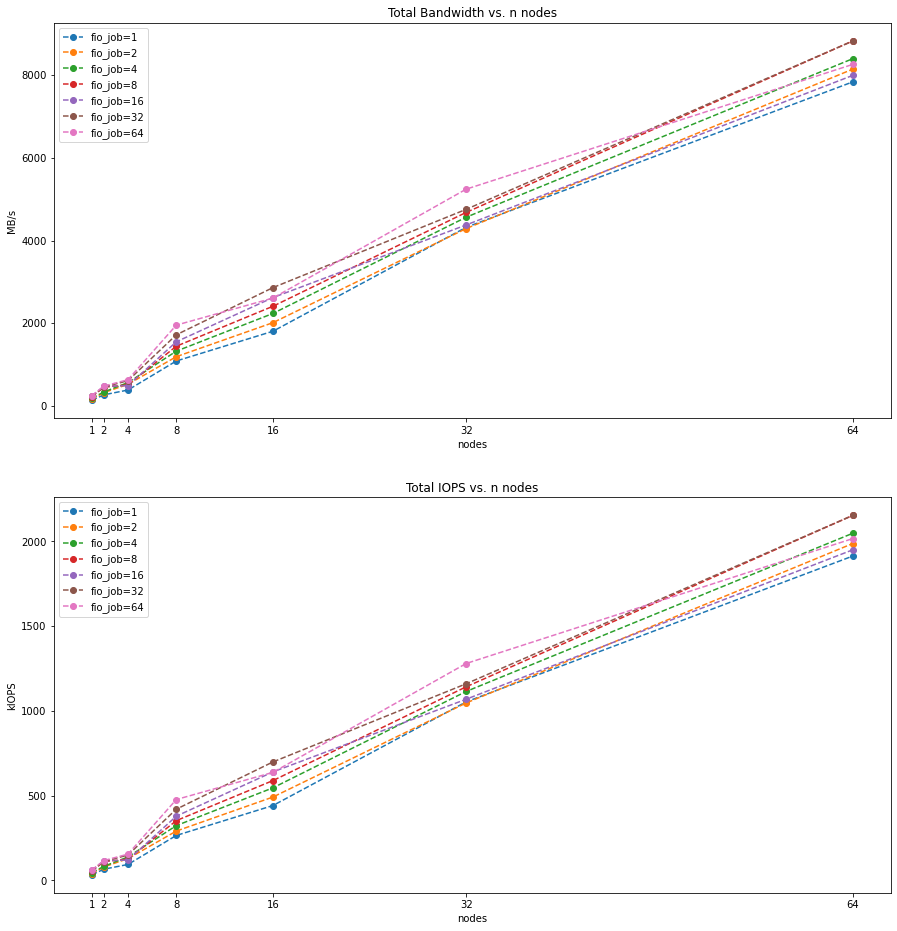

In [5]:
# SEQ_READ
HOME_seqread = "/home/ccochato/Desktop/Computing/HPC/PROJECT/FIO/fio-test/seqread/"
nodes = [1,2,4,8,16,32, 64]
fiojobs = [1,2,4,8, 16, 32, 64]
plot_bw_iops(HOME_seqread, nodes, fiojobs)

# Randread plot

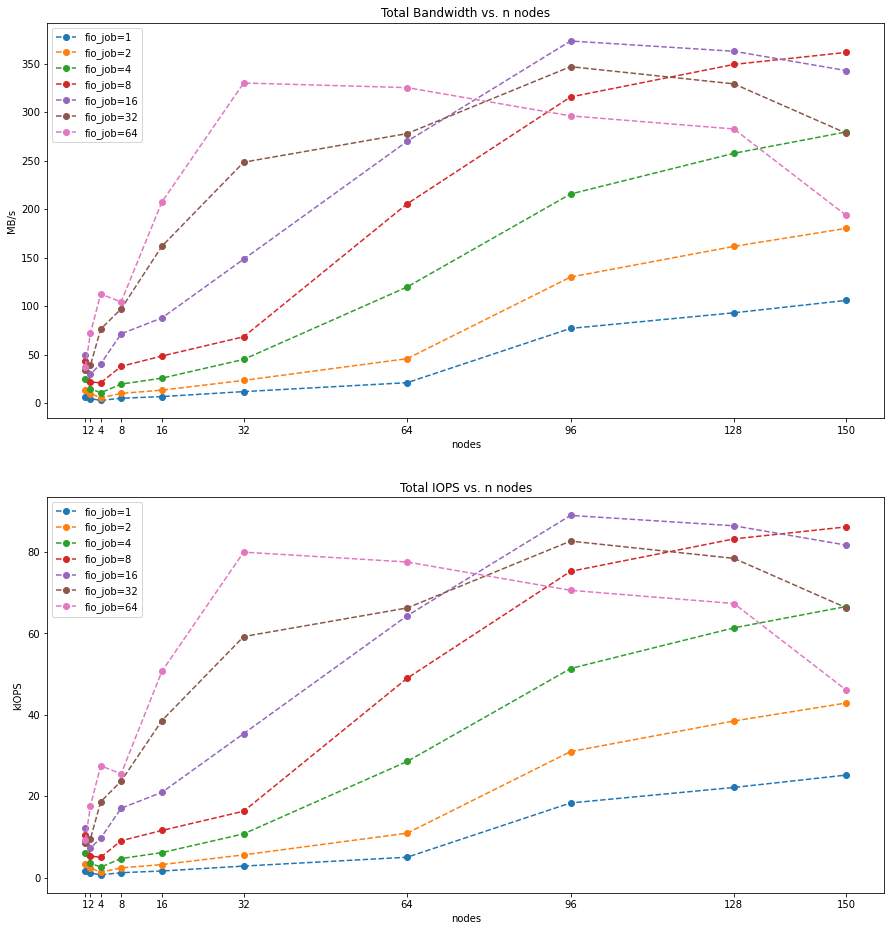

In [6]:
# RAND_READ
HOME_randread = "/home/ccochato/Desktop/Computing/HPC/PROJECT/FIO/fio-test/randread/"
nodes = [1, 2, 4, 8, 16, 32, 64, 96, 128, 150]
fiojobs = [1,2,4,8, 16, 32, 64]
plot_bw_iops(HOME_randread, nodes, fiojobs)